# Quick intro

This is a jupyter notebook for testing / coding. So far, each code block is a separate test; unlike an ordinary notebook, they are not meant to run sequentially.

Let's do MCMC:


Next, running "ei". This started out as a copy of Fritz's code but it's evolved into a working version of ours.

base:Yes, I will run. line 5 3 :
Reloading polytopize.
exception: [Errno 2] No such file or directory: 'eiresultsQ/scenario_SIG0.02_0_N2774.csv'
alpha beta line 41 1 : tensor([ 0.2000, -0.4800,  0.2800]) tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]])
ec:tensor([ 0.2000, -0.4800,  0.2800]) line 41 1 :
erc:tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]]) line 41 1 :
y[0]:tensor([[ 620.,  249., 2011.],
        [  98.,   97.,   29.],
        [  38.,   17.,   49.]]) line 41 1 :
VS tensor([[ 756.,  363., 2089.],
        [ 771.,  293., 2153.],
        [1134.,  504., 2688.],
        [ 548.,  253., 1521.]])
eiresultsQ/scenario_SIG0.02_0_N2774.csv created
svi.step(... line 41 1 : 0 55.48 torch.Size([50, 9])
guide:begin line 41 1 : 55.48 True
types? line 100 1 : [torch.float64, torch.float64]
types? line 100 2 : [torch.float64, torch.float64]
types? line 100 3 : [torch.f

epoch 100 loss = 8.10E+08, mean_loss=8.00E+08;
 logitstar = tensor([[-0.1815, -0.7389,  0.9204],
        [ 0.1987, -0.1850, -0.0137],
        [-0.1801, -0.5317,  0.7119]], grad_fn=<AddBackward0>)
sds: tensor(0.1732, grad_fn=<StdBackward0>) tensor(0.1523, grad_fn=<AddBackward0>) tensor(0.1171, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0045, -0.4844], grad_fn=<SliceBackward>)
epoch 110 loss = 6.24E+08, mean_loss=7.93E+08;
 logitstar = tensor([[-0.1497, -0.7879,  0.9376],
        [ 0.2985, -0.1343, -0.1642],
        [-0.1623, -0.5309,  0.6932]], grad_fn=<AddBackward0>)
sds: tensor(0.1374, grad_fn=<StdBackward0>) tensor(0.1116, grad_fn=<AddBackward0>) tensor(0.0632, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0348, -0.4717], grad_fn=<SliceBackward>)
epoch 120 loss = 7.05E+08, mean_loss=7.84E+08;
 logitstar = tensor([[-0.1398, -0.8252,  0.9649],
        [ 0.3878, -0.0717, -0.3161],
        [-0.1435, -0.5182,  0.6617]], grad_fn=<AddBackward0>)
svi.step(... line 41 128
guide:begin

sds: tensor(0.0746, grad_fn=<StdBackward0>) tensor(0.0769, grad_fn=<AddBackward0>) tensor(0.0209, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1763, -0.4422], grad_fn=<SliceBackward>)
epoch 310 loss = 6.82E+08, mean_loss=6.86E+08;
 logitstar = tensor([[-0.0465, -1.0530,  1.0994],
        [ 0.4552,  0.2378, -0.6930],
        [ 0.1201, -0.5115,  0.3914]], grad_fn=<AddBackward0>)
sds: tensor(0.0994, grad_fn=<StdBackward0>) tensor(0.0774, grad_fn=<AddBackward0>) tensor(0.0191, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1765, -0.4432], grad_fn=<SliceBackward>)
epoch 320 loss = 7.26E+08, mean_loss=6.83E+08;
 logitstar = tensor([[-0.0470, -1.0549,  1.1019],
        [ 0.4413,  0.2485, -0.6898],
        [ 0.1352, -0.5232,  0.3880]], grad_fn=<AddBackward0>)
sds: tensor(0.1053, grad_fn=<StdBackward0>) tensor(0.0745, grad_fn=<AddBackward0>) tensor(0.0202, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1797, -0.4405], grad_fn=<SliceBackward>)
epoch 330 loss = 6.95E+08, mean_loss=6.81E+0

model:end line 41 1024
sds: tensor(0.0996, grad_fn=<StdBackward0>) tensor(0.0901, grad_fn=<AddBackward0>) tensor(0.0232, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1614, -0.4309], grad_fn=<SliceBackward>)
epoch 520 loss = 6.69E+08, mean_loss=6.71E+08;
 logitstar = tensor([[-0.0617, -1.0409,  1.1027],
        [ 0.4596,  0.2402, -0.6998],
        [ 0.0865, -0.4919,  0.4055]], grad_fn=<AddBackward0>)
sds: tensor(0.1138, grad_fn=<StdBackward0>) tensor(0.0873, grad_fn=<AddBackward0>) tensor(0.0196, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1628, -0.4280], grad_fn=<SliceBackward>)
epoch 530 loss = 5.97E+08, mean_loss=6.70E+08;
 logitstar = tensor([[-0.0600, -1.0312,  1.0912],
        [ 0.4477,  0.2436, -0.6913],
        [ 0.1007, -0.4963,  0.3955]], grad_fn=<AddBackward0>)
sds: tensor(0.0816, grad_fn=<StdBackward0>) tensor(0.0738, grad_fn=<AddBackward0>) tensor(0.0192, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1693, -0.4335], grad_fn=<SliceBackward>)
epoch 540 loss = 5.99

    Size 6: [400, 1]; noNAN
sdprc line 1384 9 : 
    Size 0: [1]; noNAN
np complete? line 1283 9 : 
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [1]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1390 9 : 
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 6]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
sdprc line 1384 10 : 
    Size 0: [1]; noNAN
np complete? line 1283 10 : 
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [1]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1390 10 : 
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 6]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [

sds: tensor(0.4345, grad_fn=<StdBackward0>) tensor(0.4325, grad_fn=<AddBackward0>) tensor(0.3828, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.2050, -0.2050], grad_fn=<SliceBackward>)
epoch 40 loss = 1.03E+09, mean_loss=8.68E+08;
 logitstar = tensor([[-0.2361, -0.2240,  0.4602],
        [-0.2358, -0.1372,  0.3730],
        [-0.1431, -0.2538,  0.3969]], grad_fn=<AddBackward0>)
types? line 100 128
sds: tensor(0.3953, grad_fn=<StdBackward0>) tensor(0.3792, grad_fn=<AddBackward0>) tensor(0.3392, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.2418, -0.2550], grad_fn=<SliceBackward>)
epoch 50 loss = 7.62E+08, mean_loss=8.64E+08;
 logitstar = tensor([[-0.2986, -0.3023,  0.6008],
        [-0.2521, -0.1531,  0.4052],
        [-0.1747, -0.3096,  0.4843]], grad_fn=<AddBackward0>)
sds: tensor(0.3556, grad_fn=<StdBackward0>) tensor(0.3407, grad_fn=<AddBackward0>) tensor(0.3025, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.2262, -0.3050], grad_fn=<SliceBackward>)
epoch 60 loss = 8.65E+08, 

        [ 0.1025, -0.5127,  0.4103]], grad_fn=<AddBackward0>)
sds: tensor(0.1046, grad_fn=<StdBackward0>) tensor(0.0951, grad_fn=<AddBackward0>) tensor(0.0466, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1657, -0.4346], grad_fn=<SliceBackward>)
epoch 250 loss = 7.27E+08, mean_loss=7.10E+08;
 logitstar = tensor([[-0.0786, -1.0116,  1.0901],
        [ 0.4727,  0.2241, -0.6968],
        [ 0.1029, -0.5164,  0.4135]], grad_fn=<AddBackward0>)
svi.step(... line 41 256
guide:begin line 41 256
lp:  line 41 256
guide:end line 41 256
model:end line 41 512
sds: tensor(0.1456, grad_fn=<StdBackward0>) tensor(0.1142, grad_fn=<AddBackward0>) tensor(0.0542, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1667, -0.4394], grad_fn=<SliceBackward>)
epoch 260 loss = 7.24E+08, mean_loss=7.05E+08;
 logitstar = tensor([[-0.0766, -1.0196,  1.0962],
        [ 0.4571,  0.2183, -0.6754],
        [ 0.1196, -0.5169,  0.3973]], grad_fn=<AddBackward0>)
sds: tensor(0.1226, grad_fn=<StdBackward0>) tensor(0.0927, g

        [ 0.1301, -0.5276,  0.3974]], grad_fn=<AddBackward0>)
sds: tensor(0.1285, grad_fn=<StdBackward0>) tensor(0.0909, grad_fn=<AddBackward0>) tensor(0.0472, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1737, -0.4465], grad_fn=<SliceBackward>)
epoch 460 loss = 6.72E+08, mean_loss=6.82E+08;
 logitstar = tensor([[-0.0636, -1.0331,  1.0966],
        [ 0.4496,  0.2100, -0.6597],
        [ 0.1350, -0.5166,  0.3816]], grad_fn=<AddBackward0>)
sds: tensor(0.1354, grad_fn=<StdBackward0>) tensor(0.1108, grad_fn=<AddBackward0>) tensor(0.0542, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1740, -0.4463], grad_fn=<SliceBackward>)
epoch 470 loss = 7.44E+08, mean_loss=6.82E+08;
 logitstar = tensor([[-0.0624, -1.0327,  1.0951],
        [ 0.4503,  0.2208, -0.6711],
        [ 0.1340, -0.5271,  0.3931]], grad_fn=<AddBackward0>)
sds: tensor(0.1252, grad_fn=<StdBackward0>) tensor(0.0988, grad_fn=<AddBackward0>) tensor(0.0467, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1762, -0.4489], grad_fn

        [ 0.0908, -0.5474,  0.4565]], grad_fn=<AddBackward0>)
sds: tensor(0.1144, grad_fn=<StdBackward0>) tensor(0.0951, grad_fn=<AddBackward0>) tensor(0.0497, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1606, -0.4532], grad_fn=<SliceBackward>)
epoch 670 loss = 7.72E+08, mean_loss=6.79E+08;
 logitstar = tensor([[-0.0400, -1.0452,  1.0852],
        [ 0.4307,  0.2496, -0.6803],
        [ 0.0911, -0.5638,  0.4728]], grad_fn=<AddBackward0>)
sds: tensor(0.1488, grad_fn=<StdBackward0>) tensor(0.1103, grad_fn=<AddBackward0>) tensor(0.0560, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1656, -0.4460], grad_fn=<SliceBackward>)
epoch 680 loss = 6.81E+08, mean_loss=6.78E+08;
 logitstar = tensor([[-0.0358, -1.0316,  1.0674],
        [ 0.4365,  0.2526, -0.6891],
        [ 0.0960, -0.5589,  0.4629]], grad_fn=<AddBackward0>)
Cutoff reached line 41 1 : 678093429.5574461 676852724.8420483
trainGuide post..................................................
,,
,,
,,
ec_then_erc_star:
tensor([[ 0.16

        [ 0.1400, -0.0600,  0.3000]])
ec:tensor([ 0.2000, -0.4800,  0.2800]) line 41 1 :
erc:tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]]) line 41 1 :
y[0]:tensor([[ 382.,  284., 2214.],
        [ 121.,   67.,   36.],
        [  27.,   11.,   66.]]) line 41 1 :
VS tensor([[ 530.,  362., 2316.],
        [ 670.,  409., 2138.],
        [1191.,  513., 2622.],
        [ 706.,  178., 1438.]])
eiresultsQ/scenario_SIG0.3_0_N2774.csv created
svi.step(... line 41 1 : 0 55.48 torch.Size([50, 9])
guide:begin line 41 1 : 55.48 True
types? line 100 1 : [torch.float64, torch.float64]
types? line 100 2 : [torch.float64, torch.float64]
types? line 100 3 : [torch.float64, torch.float64]
sds: tensor(0.6238, grad_fn=<StdBackward0>) tensor(0.6209, grad_fn=<AddBackward0>) tensor(0.5720, grad_fn=<StdBackward0>)
model:end line 41 1 :
lp:  line 41 1 : tensor(-40075498.4424, grad_fn=<AddBackward0>) tensor(-1084.7874, grad_fn=<AddBackward0>) 781
p

sds: tensor(0.3361, grad_fn=<StdBackward0>) tensor(0.3104, grad_fn=<AddBackward0>) tensor(0.2844, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.1047, -0.5291], grad_fn=<SliceBackward>)
epoch 110 loss = 7.41E+08, mean_loss=7.90E+08;
 logitstar = tensor([[-0.0853, -0.5607,  0.6461],
        [-0.1310, -0.4879,  0.6188],
        [-0.0979, -0.5386,  0.6365]], grad_fn=<AddBackward0>)
sds: tensor(0.3718, grad_fn=<StdBackward0>) tensor(0.3419, grad_fn=<AddBackward0>) tensor(0.3078, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([-0.0686, -0.5577], grad_fn=<SliceBackward>)
epoch 120 loss = 8.50E+08, mean_loss=7.91E+08;
 logitstar = tensor([[-0.0544, -0.5721,  0.6264],
        [-0.0938, -0.5120,  0.6058],
        [-0.0575, -0.5890,  0.6465]], grad_fn=<AddBackward0>)
svi.step(... line 41 128
guide:begin line 41 128
lp:  line 41 128
guide:end line 41 128
model:end line 41 256
sds: tensor(0.3392, grad_fn=<StdBackward0>) tensor(0.3185, grad_fn=<AddBackward0>) tensor(0.2853, grad_fn=<StdBackward0>)


        [ 0.0090, -0.4708,  0.4619]], grad_fn=<AddBackward0>)
sds: tensor(0.2633, grad_fn=<StdBackward0>) tensor(0.2489, grad_fn=<AddBackward0>) tensor(0.2310, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0181, -0.5366], grad_fn=<SliceBackward>)
epoch 320 loss = 7.57E+08, mean_loss=7.44E+08;
 logitstar = tensor([[-0.1160, -0.8164,  0.9325],
        [ 0.1502, -0.3279,  0.1777],
        [ 0.0201, -0.4656,  0.4455]], grad_fn=<AddBackward0>)
sds: tensor(0.2715, grad_fn=<StdBackward0>) tensor(0.2525, grad_fn=<AddBackward0>) tensor(0.2153, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0315, -0.5218], grad_fn=<SliceBackward>)
epoch 330 loss = 6.86E+08, mean_loss=7.38E+08;
 logitstar = tensor([[-0.1324, -0.8438,  0.9762],
        [ 0.2129, -0.2636,  0.0507],
        [ 0.0139, -0.4581,  0.4443]], grad_fn=<AddBackward0>)
sds: tensor(0.2231, grad_fn=<StdBackward0>) tensor(0.2068, grad_fn=<AddBackward0>) tensor(0.1771, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0575, -0.4981], grad_fn

        [ 0.0822, -0.4277,  0.3455]], grad_fn=<AddBackward0>)
sds: tensor(0.2413, grad_fn=<StdBackward0>) tensor(0.2233, grad_fn=<AddBackward0>) tensor(0.1906, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1125, -0.4414], grad_fn=<SliceBackward>)
epoch 530 loss = 6.17E+08, mean_loss=6.96E+08;
 logitstar = tensor([[-0.0271, -1.0293,  1.0563],
        [ 0.2652,  0.1222, -0.3874],
        [ 0.0994, -0.4171,  0.3177]], grad_fn=<AddBackward0>)
sds: tensor(0.2208, grad_fn=<StdBackward0>) tensor(0.2064, grad_fn=<AddBackward0>) tensor(0.1761, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1220, -0.4338], grad_fn=<SliceBackward>)
epoch 540 loss = 7.46E+08, mean_loss=6.92E+08;
 logitstar = tensor([[-0.0033, -1.0176,  1.0209],
        [ 0.2643,  0.1391, -0.4034],
        [ 0.1049, -0.4230,  0.3180]], grad_fn=<AddBackward0>)
sds: tensor(0.2328, grad_fn=<StdBackward0>) tensor(0.2086, grad_fn=<AddBackward0>) tensor(0.1757, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1196, -0.4403], grad_fn

sds: tensor(0.2281, grad_fn=<StdBackward0>) tensor(0.1966, grad_fn=<AddBackward0>) tensor(0.1540, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1122, -0.4477], grad_fn=<SliceBackward>)
epoch 740 loss = 6.20E+08, mean_loss=6.80E+08;
 logitstar = tensor([[ 0.0423, -1.0526,  1.0102],
        [ 0.2178,  0.1416, -0.3594],
        [ 0.0766, -0.4321,  0.3555]], grad_fn=<AddBackward0>)
sds: tensor(0.2606, grad_fn=<StdBackward0>) tensor(0.2334, grad_fn=<AddBackward0>) tensor(0.1837, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1032, -0.4496], grad_fn=<SliceBackward>)
epoch 750 loss = 6.85E+08, mean_loss=6.81E+08;
 logitstar = tensor([[ 0.0354, -1.0507,  1.0153],
        [ 0.2005,  0.1504, -0.3509],
        [ 0.0736, -0.4486,  0.3751]], grad_fn=<AddBackward0>)
sds: tensor(0.2022, grad_fn=<StdBackward0>) tensor(0.1772, grad_fn=<AddBackward0>) tensor(0.1370, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.0981, -0.4437], grad_fn=<SliceBackward>)
epoch 760 loss = 7.60E+08, mean_loss=6.83E+0

    Size 6: [400]; noNAN
sampleYs line 1390 2 : 
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 6]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
sdprc line 1384 3 : 
    Size 0: [1]; noNAN
np complete? line 1283 3 : 
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [1]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1390 3 : 
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 6]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
sdprc line 1384 4 : 
    Size 0: [1]; noNAN
np complete? line 1283 4 : 
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [1]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400

guide:begin line 41 4 : 55.48 True
types? line 100 10 : [torch.float64, torch.float64]
model:end line 41 7 :
lp:  line 41 4 : tensor(-50333902.7740, grad_fn=<AddBackward0>) tensor(-966.8504, grad_fn=<AddBackward0>) 781
guide:end line 41 4 :
model:end line 41 8 :
svi.step(... line 41 5 : 4 55.48 torch.Size([50, 9])
guide:begin line 41 5 : 55.48 True
model:end line 41 9 :
lp:  line 41 5 : tensor(-44129309.9010, grad_fn=<AddBackward0>) tensor(-1059.3645, grad_fn=<AddBackward0>) 781
guide:end line 41 5 :
model:end line 41 10 :
svi.step(... line 41 6 : 5 55.48 torch.Size([50, 9])
guide:begin line 41 6 : 55.48 True
types? line 100 16
lp:  line 41 6 : tensor(-43360956.5327, grad_fn=<AddBackward0>) tensor(-1064.6243, grad_fn=<AddBackward0>) 781
guide:end line 41 6 :
svi.step(... line 41 7 : 6 55.48 torch.Size([50, 9])
guide:begin line 41 7 : 55.48 True
lp:  line 41 7 : tensor(-47759667.7814, grad_fn=<AddBackward0>) tensor(-991.2368, grad_fn=<AddBackward0>) 781
guide:end line 41 7 :
svi.step(..

        [-0.0315, -0.5176,  0.5491]], grad_fn=<AddBackward0>)
types? line 100 512
sds: tensor(0.0938, grad_fn=<StdBackward0>) tensor(0.0747, grad_fn=<AddBackward0>) tensor(0.0208, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1515, -0.4250], grad_fn=<SliceBackward>)
epoch 170 loss = 6.72E+08, mean_loss=7.30E+08;
 logitstar = tensor([[-0.1110, -0.9686,  1.0797],
        [ 0.5501,  0.2065, -0.7567],
        [ 0.0155, -0.5130,  0.4975]], grad_fn=<AddBackward0>)
sds: tensor(0.0742, grad_fn=<StdBackward0>) tensor(0.0782, grad_fn=<AddBackward0>) tensor(0.0225, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1483, -0.4308], grad_fn=<SliceBackward>)
epoch 180 loss = 8.24E+08, mean_loss=7.27E+08;
 logitstar = tensor([[-0.1088, -0.9912,  1.1000],
        [ 0.5075,  0.2046, -0.7121],
        [ 0.0460, -0.5059,  0.4599]], grad_fn=<AddBackward0>)
sds: tensor(0.1213, grad_fn=<StdBackward0>) tensor(0.0967, grad_fn=<AddBackward0>) tensor(0.0268, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.158

    Size 6: [400, 1]; noNAN
sdprc line 1384 3 : 
    Size 0: [1]; noNAN
np complete? line 1283 3 : 
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [1]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1390 3 : 
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 6]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400, 1]; noNAN
sdprc line 1384 4 : 
    Size 0: [1]; noNAN
np complete? line 1283 4 : 
    Size 0: [400]; noNAN
    Size 1: [400, 3, 3]; noNAN
    Size 2: [400, 9]; noNAN
    Size 3: [400, 3, 3]; noNAN
    Size 4: [1]; noNAN
    Size 5: [400, 9]; noNAN
    Size 6: [400]; noNAN
sampleYs line 1390 4 : 
    Size 0: [400, 13]; noNAN
    Size 1: [400, 1, 13]; noNAN
    Size 2: [13]; noNAN
    Size 3: [694, 13, 13]; noNAN
    Size 4: [400, 6]; noNAN
    Size 5: [400, 3, 3]; noNAN
    Size 6: [400

guide:end line 41 4 :
model:end line 41 8 :
svi.step(... line 41 5 : 4 55.48 torch.Size([50, 9])
guide:begin line 41 5 : 55.48 True
model:end line 41 9 :
lp:  line 41 5 : tensor(-43186552.6094, grad_fn=<AddBackward0>) tensor(-915.0153, grad_fn=<AddBackward0>) 781
guide:end line 41 5 :
model:end line 41 10 :
svi.step(... line 41 6 : 5 55.48 torch.Size([50, 9])
guide:begin line 41 6 : 55.48 True
types? line 100 16
lp:  line 41 6 : tensor(-46914950.3418, grad_fn=<AddBackward0>) tensor(-973.0001, grad_fn=<AddBackward0>) 781
guide:end line 41 6 :
svi.step(... line 41 7 : 6 55.48 torch.Size([50, 9])
guide:begin line 41 7 : 55.48 True
lp:  line 41 7 : tensor(-51534965.0898, grad_fn=<AddBackward0>) tensor(-980.2379, grad_fn=<AddBackward0>) 781
guide:end line 41 7 :
svi.step(... line 41 8 : 7 55.48 torch.Size([50, 9])
guide:begin line 41 8 : 55.48 True
lp:  line 41 8 : tensor(-43760783.8670, grad_fn=<AddBackward0>) tensor(-906.1696, grad_fn=<AddBackward0>) 781
guide:end line 41 8 :
model:end li

sds: tensor(0.1604, grad_fn=<StdBackward0>) tensor(0.1125, grad_fn=<AddBackward0>) tensor(0.0512, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1503, -0.4322], grad_fn=<SliceBackward>)
epoch 170 loss = 6.07E+08, mean_loss=7.23E+08;
 logitstar = tensor([[-0.1297, -0.9180,  1.0477],
        [ 0.5700,  0.1640, -0.7341],
        [ 0.0105, -0.5427,  0.5323]], grad_fn=<AddBackward0>)
sds: tensor(0.1512, grad_fn=<StdBackward0>) tensor(0.1140, grad_fn=<AddBackward0>) tensor(0.0576, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1445, -0.4386], grad_fn=<SliceBackward>)
epoch 180 loss = 7.32E+08, mean_loss=7.23E+08;
 logitstar = tensor([[-0.1504, -0.9485,  1.0990],
        [ 0.5310,  0.1648, -0.6957],
        [ 0.0529, -0.5321,  0.4792]], grad_fn=<AddBackward0>)
sds: tensor(0.1173, grad_fn=<StdBackward0>) tensor(0.0996, grad_fn=<AddBackward0>) tensor(0.0541, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1635, -0.4244], grad_fn=<SliceBackward>)
epoch 190 loss = 7.16E+08, mean_loss=7.16E+0

        [ 0.1175, -0.5868,  0.4693]], grad_fn=<AddBackward0>)
sds: tensor(0.1264, grad_fn=<StdBackward0>) tensor(0.1008, grad_fn=<AddBackward0>) tensor(0.0471, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1710, -0.4672], grad_fn=<SliceBackward>)
epoch 380 loss = 6.43E+08, mean_loss=6.86E+08;
 logitstar = tensor([[-0.0531, -1.0362,  1.0893],
        [ 0.4507,  0.2111, -0.6618],
        [ 0.1153, -0.5766,  0.4613]], grad_fn=<AddBackward0>)
sds: tensor(0.1561, grad_fn=<StdBackward0>) tensor(0.1200, grad_fn=<AddBackward0>) tensor(0.0495, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1754, -0.4643], grad_fn=<SliceBackward>)
epoch 390 loss = 6.60E+08, mean_loss=6.84E+08;
 logitstar = tensor([[-0.0510, -1.0332,  1.0842],
        [ 0.4540,  0.2273, -0.6813],
        [ 0.1234, -0.5869,  0.4635]], grad_fn=<AddBackward0>)
sds: tensor(0.0849, grad_fn=<StdBackward0>) tensor(0.0936, grad_fn=<AddBackward0>) tensor(0.0456, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1743, -0.4660], grad_fn

        [ 0.0581, -0.5200,  0.4619]], grad_fn=<AddBackward0>)
sds: tensor(0.1000, grad_fn=<StdBackward0>) tensor(0.0966, grad_fn=<AddBackward0>) tensor(0.0531, grad_fn=<StdBackward0>)
ps2
 ecstar = tensor([ 0.1532, -0.4420], grad_fn=<SliceBackward>)
epoch 590 loss = 8.00E+08, mean_loss=6.81E+08;
 logitstar = tensor([[-0.0636, -1.0351,  1.0988],
        [ 0.4490,  0.2202, -0.6692],
        [ 0.0743, -0.5110,  0.4368]], grad_fn=<AddBackward0>)
Cutoff reached line 41 1 : 680857945.635895 680617876.0818118
trainGuide post..................................................
,,
,,
,,
ec_then_erc_star:
tensor([[ 0.1532, -0.4420],
        [-0.2169, -0.5931],
        [ 0.2958,  0.6622]], grad_fn=<SliceBackward>) (10 elems)
globalpsi:
tensor([0.0835, 0.0712, 0.0864, 0.0798, 0.0721, 0.0426],
       grad_fn=<SliceBackward>) (10 elems)
precinctpsi:
tensor([0.1881, 0.1920, 0.1901, 0.1920, 0.1920, 0.1418, 0.1920, 0.1920, 0.1920,
        0.1920], grad_fn=<SliceBackward>) (10 elems)
::
::
rerunGuide 2774

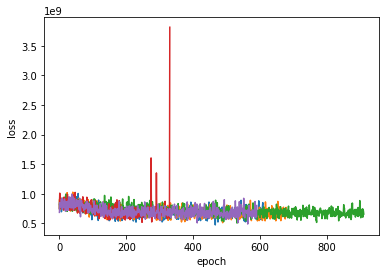

In [3]:
from importlib import reload
import ei_multisampleQ #import *
reload(ei_multisampleQ)
from ei_multisampleQ import *
import cProfile as profile

#ec,erc = legible_values(3,3)
#print(ec,"\n",erc,"\n",ec+erc)
inits = good_inits(0.)
#del inits["ercstar_raw"]
for (nsamps,subn) in [(15,50)]:#[(2,60),(5,60),(2,30),(20,30),(40,5)]:
    
    for i in range(5):
        for sigma_nu in [.02, .1, .3, ]: #.02, 
            #%prun result = trainGuide(nsamps=nsamps,subsample_n=subn)#inits = inits)
            trainGuide(nsamps=nsamps,subsample_n=subn,sigmanu=sigma_nu,dversion=i, force_full=True)#inits = inits)

            


.

.

.



In [2]:
from importlib import reload
import ei_multisample #import *
reload(ei_multisample)
from ei_multisample import *
import cProfile as profile

inits = dict() #good_inits()
#del inits["ercstar_raw"]
#%prun result = trainGuide(inits = inits)

NCparams = EIData.load("NC_Data/NC_2016_statewide_alpha_and_beta.csv")
print(NCparams.alpha + NCparams.beta)
#print("components")
#print(NCparams.alpha)
#
#print(NCparams.beta)
print(SIM_SIGMA_NU)
SIM_SIGMA_NU = 0.001
print(ei_multisample.SIM_SIGMA_NU)
ei_multisample.SIM_SIGMA_NU = .0001
print(ei_multisample.SIM_SIGMA_NU)

base:Yes, I will run. line 5 3 :
Reloading polytopize.
tensor([[ 0.0500, -0.9100,  1.2200],
        [ 0.2100,  0.0100, -0.9500],
        [ 0.3400, -0.5400,  0.5800]])
0.15
0.15
0.0001


# Testing hessian transparency

In [18]:
import torch
ts = torch.tensor
os = torch.ones
zs = torch.zeros
from importlib import reload
import myhessian
reload(myhessian)

t1 = os(2,2,requires_grad=True)
r = torch.sum(t1 * t1 * t1)

h = myhessian.hessian(r,t1)
print("hess",h)
r2 = torch.sum(h * h)
[r3] = torch.autograd.grad(r,t1,create_graph=True,retain_graph=True)
print("d ",r3)
print("Σd ",torch.sum(r3))
[r4] = torch.autograd.grad(torch.sum(r3),t1,create_graph=True,retain_graph=True)
print("dΣdΣd ",torch.autograd.grad(torch.sum(r4),t1,create_graph=True,retain_graph=True))
print(torch.autograd.grad(r2,t1))

hess tensor([[6., 0., 0., 0.],
        [0., 6., 0., 0.],
        [0., 0., 6., 0.],
        [0., 0., 0., 6.]], grad_fn=<CopySlices>)
d  tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
Σd  tensor(12., grad_fn=<SumBackward0>)
dΣdΣd  (tensor([[6., 6.],
        [6., 6.]]),)
(tensor([[72., 72.],
        [72., 72.]]),)


In [4]:
import sys
import hessian

from importlib import reload
import polytopize #import *
reload(polytopize)
from polytopize import *

import tests


Yes, I will run.
Yes, I will run.
ge fail
loc tensor([[ 0.3147],
        [ 2.4440],
        [-4.0535],
        [ 2.2007]])
polytopedLoc tensor([[ 2.1063e-01,  2.1136e-02],
        [ 2.8514e-01, -1.8626e-09],
        [ 3.4959e-01,  9.9957e-02],
        [ 3.5462e-01,  1.1892e-02],
        [ 2.5462e+00,  3.2228e-01]])
ge fail
loc tensor([[-5.8855],
        [-5.2805],
        [ 5.4654],
        [ 0.1889]])
polytopedLoc tensor([[ 2.8885e-01,  1.1871e+00],
        [ 8.5629e-01,  2.0505e+00],
        [ 3.9984e-01, -1.4901e-08],
        [ 9.5542e-01,  1.5538e+00],
        [ 1.0063e+00,  9.9522e-01]])
Reloading cmult...
callable? <bound method TorchDistributionMixin.__call__ of Multinomial()>
callable? <bound method TorchDistributionMixin.__call__ of TorchCMult()>
Sampling multinomial: tensor([1., 2.])
Sampling cm2: tensor([0., 3.])
tensor(5.6022, grad_fn=<NegBackward>) tensor([[112.2500]])


# Test rank1torch (to get yhat from pi,n,v)

In [10]:
from importlib import reload
import rank1torch #import *
reload(rank1torch)
from rank1torch import *

test_solver()

Testing optimize_Q (50 tests): 
R=3, C=5, tolerance=0.001
Oh no! In test 3, Q has some negative entries:
	 trueQ[2][4]=0.00010659269901225343, 
	     Q[2][4]=-0.00021605131041724235
Oh no! In test 5, Q has some negative entries:
	 trueQ[1][4]=0.00011974151857430115, 
	     Q[1][4]=-1.1631345842033625e-06
Oh no! In test 8, Q has some negative entries:
	 trueQ[0][1]=2.882161788875237e-05, 
	     Q[0][1]=-0.0004783869662787765
Oh no! In test 15, Q has some negative entries:
	 trueQ[2][3]=0.0007846675580367446, 
	     Q[2][3]=-6.166117964312434e-05
Oh no! In test 28, Q has some negative entries:
	 trueQ[0][4]=8.13114020274952e-05, 
	     Q[0][4]=-0.00018321917741559446
Oh no! In test 40, Q has some negative entries:
	 trueQ[2][3]=0.00032634526723995805, 
	     Q[2][3]=-0.000617634505033493
Oh no! In test 47, Q has some negative entries:
	 trueQ[2][1]=0.00017936740186996758, 
	     Q[2][1]=-0.00041433278238400817
Oh no! In test 48, Q has some negative entries:
	 trueQ[0][0]=4.52485837740823

## Overview

Most SVI problems in pyro are coded as a model, a generic guide (such as: multivariate Gaussian in all parameters), and specific observations/data (passed as arguments to svi.step). For EI, that's going to be different; the observations are going to be built into the guide function, leaving nothing to include in the "data" argument to svi.step.

That means there is a lot of work for the guide to do. As usual, it must establish reasonable distributional families for the posterior of each of the hyperparameters. But for the latent parameters, the job of the guide is to take a "relative strength" number for each race/candidate/precinct combo, and turn that into a number of votes for each combo, such that those numbers obey all the constraints set by observations. This means that for each precinct (considered separately), the latent guide must:

-Find the "center point" where candidate preference is independent of race.

-Find the "basis vectors" (actually, there are more than enough of them to form a basis) which determine the directions to move in the space.

-For any given set of "relative strengths" which is a distance $d$ in a direction $\theta$, find the first constraint violated when moving in that direction, and the distance $r$ between the origin and that constraint.

-Project the "relative strengths" onto the numbers of votes, by moving $r(1-e^{-d})$ in direction $\theta$.

#### a = zs(2,2,2,2)
a[0,1,1,1] = 2
print(a[1,1])
print(a[0,1])
print(torch.max(a))
print(torch.distributions.exponential.Exponential(ts([1])).sample(4))